In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import calinski_harabasz_score

In [2]:
file_path = r"C:\Users\mipo\OneDrive - Hillyard, Inc\Desktop\GitHub\hillyard_routing_analysis\Resources\lancaster_54.csv"
data = pd.read_csv(file_path)

In [3]:
selected_columns = ['Latitude', 'Longitude']
X = data[selected_columns]
#, 'Total Orders', 'Total Deliveries', 'Avg. Revenue' - removed from range

In [4]:
X.fillna(0, inplace=True)

C:\Users\mipo\AppData\Local\Temp\ipykernel_3688\2534066105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


In [5]:
#determine the range of the amount of clusters to analyze
k_values = range(2,3)
ch_scores = []

for k in k_values:
    kmeans =  KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    ch_score = calinski_harabasz_score(X, labels)
    ch_scores.append(ch_score)

C:\Users\mipo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mipo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


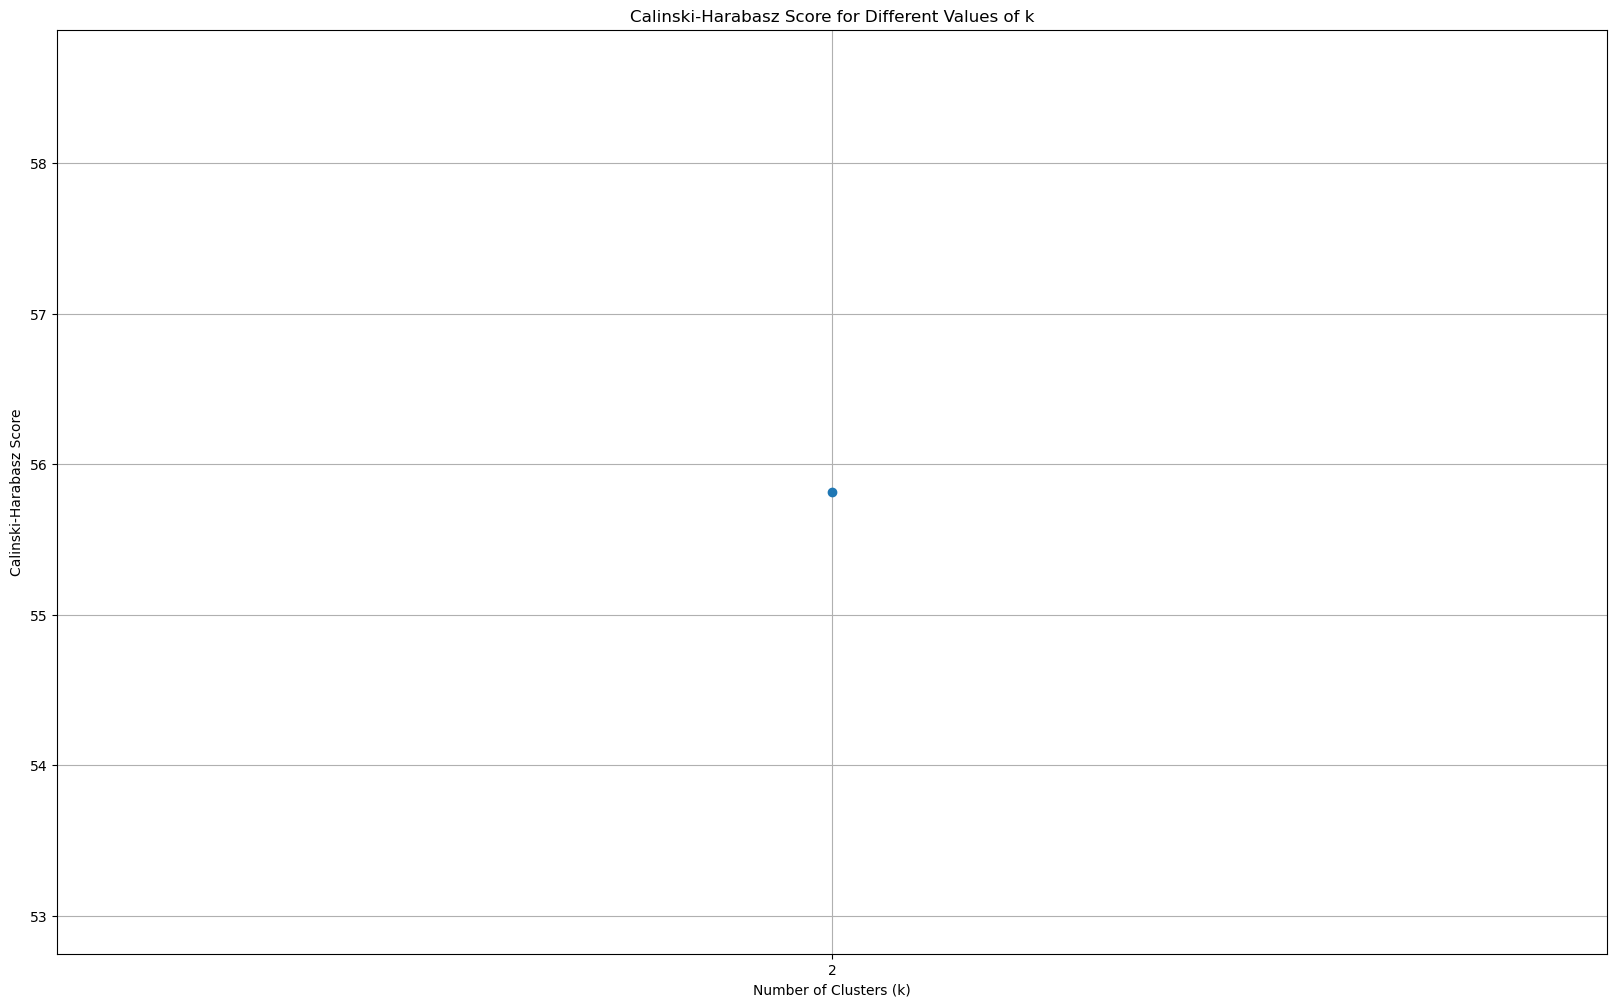

In [6]:
plt.figure(figsize=(20, 12))
plt.plot(k_values, ch_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score for Different Values of k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [7]:
k = k_values[np.argmax(ch_scores)]
k

2

In [8]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

C:\Users\mipo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mipo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


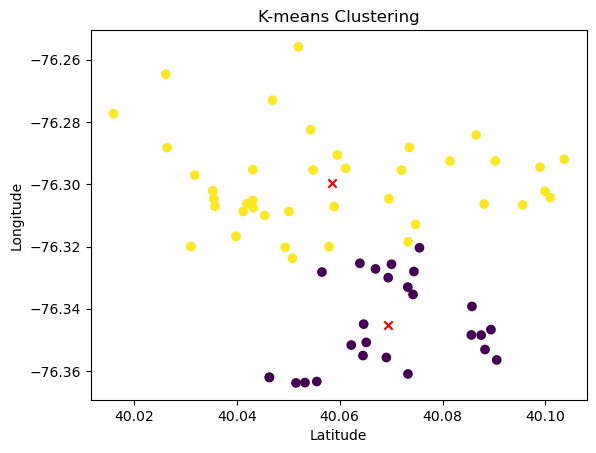

In [9]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.title('K-means Clustering')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [10]:
print("Cluster Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i+1}: Latitude = {centroid[0]}, Longitude = {centroid[1]}")

Cluster Centroids:
Cluster 1: Latitude = 40.069357230769235, Longitude = -76.34537430769231
Cluster 2: Latitude = 40.058511925, Longitude = -76.2994445


In [11]:
cluster_centroids_df = pd.DataFrame(centroids, columns=X.columns)
cluster_centroids_df

,Latitude,Longitude
0,40.069357,-76.345374
1,40.058512,-76.299445


In [12]:
cluster_counts = pd.Series(labels).value_counts().sort_index()
cluster_centroids_df['Location Count'] = cluster_counts.values
cluster_centroids_df

,Latitude,Longitude,Location Count
0,40.069357,-76.345374,26
1,40.058512,-76.299445,40


In [13]:
data['Cluster'] = labels
data

,Account Manager,Sold To ID,Sold To Name,Ship To ID,Ship To ID.1,Ship To City,Street Address,State,Ship To Zip Code,Full Address,...,Total Deliveries,Avg. Deliveries,Avg. Lines,Avg. Revenue,Total Revenue,Avg. GP,Total GP,Quantity,Margin,Cluster
0,Brad Miller (0000142022),239198,ARCHETYPE,239198,ARCHETYPE,Lancaster,317 N Market St,PA,17603,"317 N Market St Lancaster, PA 17603",...,7,1.166667,2.500000,199.108333,1194.65,74.256667,445.54,25.0,0.372946,1
1,Andrew Clippinger (0000142012),239230,AUTOHAUS LANC INC,239230,AUTOHAUS LANC INC,Lancaster,1373 Manheim Pike,PA,17601,"1373 Manheim Pike Lancaster, PA 17601",...,11,1.100000,3.100000,397.941000,3979.41,166.908000,1669.08,51.0,0.419429,0
2,Brad Miller (0000142022),239367,BOYD WILSON PROPERTY#,239367,BOYD WILSON PROPERTY#,Lancaster,600 Olde Hickory Rd Ste 100,PA,17601,"600 Olde Hickory Rd Ste 100 Lancaster, PA 17601",...,11,1.100000,2.400000,206.862000,2068.62,82.415000,824.15,36.0,0.398406,1
3,Pete Annick (0000142010),239466,CALVARY FELLOWSHIP HOMES APN#,239466,CALVARY FELLOWSHIP HOMES APN#,Lancaster,502 Elizabeth Dr,PA,17601,"502 Elizabeth Dr Lancaster, PA 17601",...,46,1.703704,10.703704,1835.839259,49567.66,465.280370,12562.57,1237.0,0.253443,1
4,Robert Diller (0000142017),239535,CHAPMAN FORD#,239535,CHAPMAN FORD#,Lancaster,1485 Manheim Pike,PA,17601,"1485 Manheim Pike Lancaster, PA 17601",...,9,1.285714,5.571429,847.295714,5931.07,328.274286,2297.92,102.0,0.387438,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Pete Annick (0000142010),238980,LANC GENERAL HOSPITAL HEALTH C,472475,LANC GENERAL HOSPITAL HEALTH C,Lancaster,2100 Harrisburg Pike,PA,17601,"2100 Harrisburg Pike Lancaster, PA 17601",...,66,1.833333,1.888889,572.746389,20618.87,164.259167,5913.33,1446.0,0.286792,0
62,Pete Annick (0000142010),331314,SUSQUEHANNA PRINTING COMPANY,473996,Susquehanna Printing Company,Lancaster,1704 Hempstead Rd,PA,17601,"1704 Hempstead Rd Lancaster, PA 17601",...,13,1.300000,2.200000,297.229000,2972.29,78.239000,782.39,103.0,0.263228,1
63,Pete Annick (0000142010),281240,FRANKLIN & MARSHALL COLLEGE,474973,Facilities & Operations LSP DD,Lancaster,760 Williamson Way Bldg 20,PA,17603,"760 Williamson Way Bldg 20 Lancaster, PA 17603",...,8,1.142857,1.428571,70.220000,491.54,46.790000,327.53,24.0,0.666334,1
64,Pete Annick (0000142010),241015,MANHEIM TWP SCHOOL SP#,479426,MANHEIM TWP SCHOOL MAINTENANCE,Lancaster,75 Valley Rd,PA,17601,"75 Valley Rd Lancaster, PA 17601",...,8,1.142857,1.571429,295.788571,2070.52,128.685714,900.80,35.0,0.435060,1


In [14]:
cluster_centroids_df.to_csv("1430_cluster_centroids_lan.csv", index=False)
data.to_csv("1430_custered_stops_lan.csv", index=False)